# Linear Regression/Logistic Regression Modelling and Support Vector Machine methods

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import decision_regions
from mlxtend.plotting import plot_decision_regions
import sklearn.metrics as mlt

3157.5734769951287


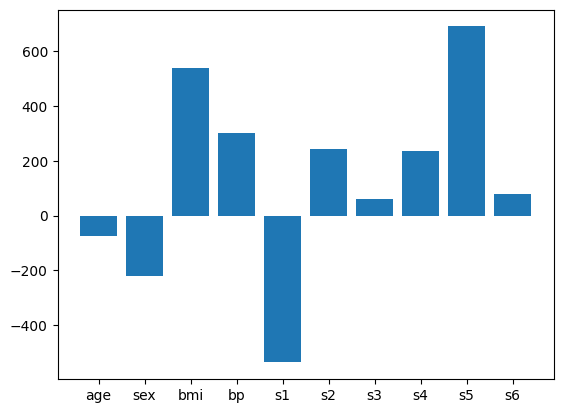

In [3]:
diabetes=load_diabetes()
X=diabetes.data
Y=diabetes.target

Xtrain,xtest,Ytrain, ytest=train_test_split(X,Y,test_size=0.3, random_state=12)
model= LinearRegression()
model.fit(Xtrain,Ytrain)
#print(model.coef_, model.intercept_)
ypred=model.predict(xtest)
print(mlt.mean_squared_error(ytest,ypred))
plt.bar(diabetes.feature_names,model.coef_);

<BarContainer object of 10 artists>

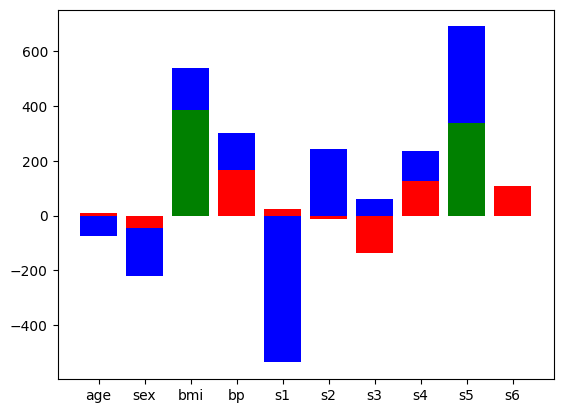

In [4]:
# Ridge and Lasso Linear Regression modelling: Its helpful for feature selection
model1= LinearRegression()
model1.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model1.coef_, color='b')

model2= Ridge()
model2.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model2.coef_, color='r')

model3= Lasso()
model3.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model3.coef_, color='g')


0.9303939218549564


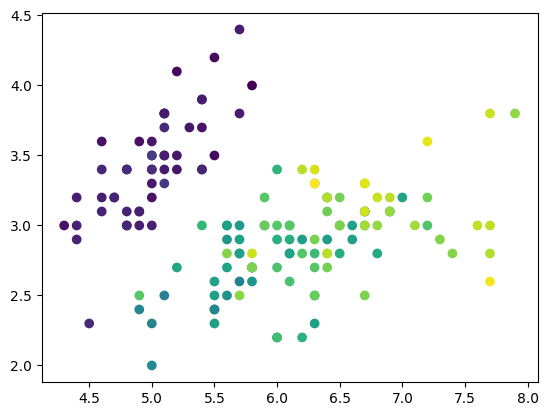

In [15]:
X=load_iris().data
Y=load_iris().target
model=LinearRegression()
model.fit(X,Y)
print(model.score(X,Y))
ypred= model.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred);

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9866666666666667


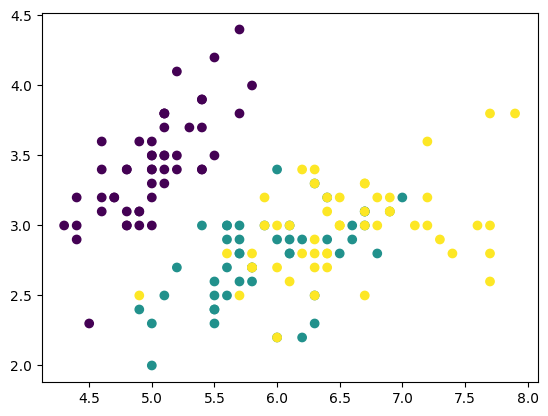

In [14]:
X=load_iris().data
y=load_iris().target
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,y)
print(model.score(X,Y))
ypred= model.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred);

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.022222222222222223


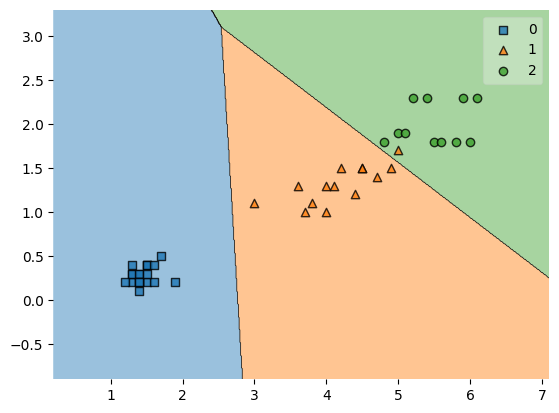

In [16]:
X=load_iris().data[:,[2,3]]
Y=load_iris().target
Xtrain, xtest, Ytrain, ytest=train_test_split(X,Y, test_size=0.3, random_state=12)
model=LogisticRegression(solver='sag', multi_class='multinomial', random_state=12)
model.fit(Xtrain,Ytrain)
ypred=model.predict(xtest)
print(mlt.mean_squared_error(ytest,ypred))
plot_decision_regions(xtest,ytest, clf=model);

<Axes: >

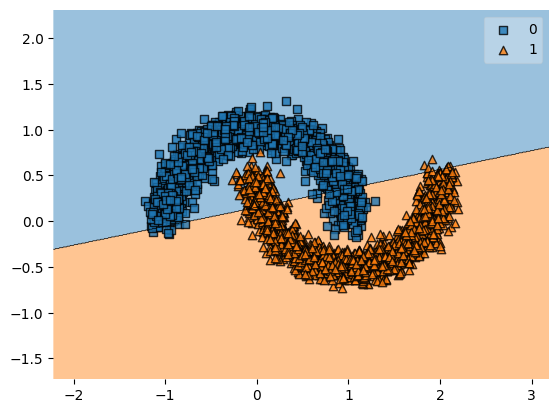

In [17]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=3000, noise=0.1)
model=LogisticRegression()
model.fit(X,Y)
plot_decision_regions(X,Y,model)

<Axes: >

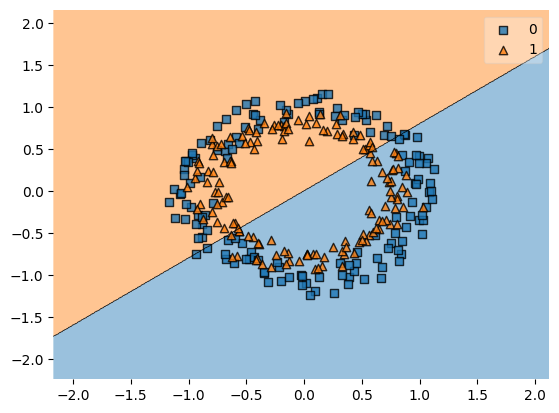

In [18]:
from sklearn.datasets import make_circles
X,Y=make_circles(n_samples=300, random_state=12, noise=0.1)
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,Y);
plot_decision_regions(X,Y,model)

# Support Vector Machine (SVM)

In [11]:
from sklearn.svm import SVC, LinearSVC

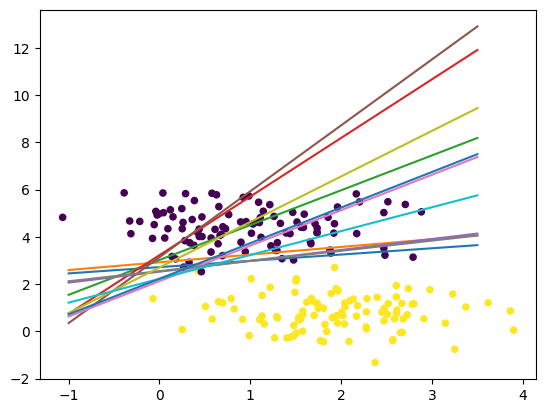

In [8]:
X,Y=make_blobs(n_samples=200,centers=2, random_state=0, cluster_std=0.8)
model=SVC(kernel='linear',C=1)
model.fit(X,Y)

#support_vectors
x_range=np.linspace(-1,3.5)
a=model.support_vectors_[:,0]
b=model.support_vectors_[:,1]

for i in range(0,len(a)):
        plt.plot(x_range, a[i]*x_range+b[i])
plt.scatter(X[:,0],X[:,1],c=Y, s=20) 


/usr/local/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


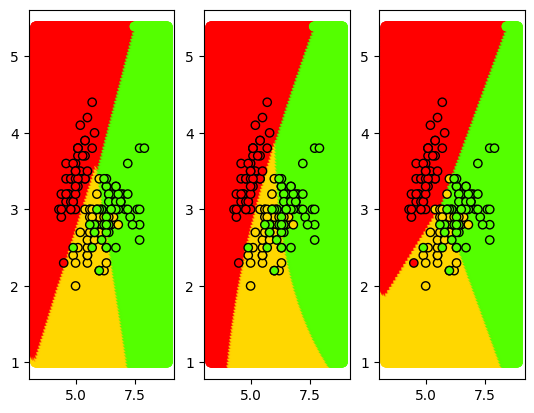

In [13]:
X=load_iris().data[:,:2]
Y=load_iris().target
models=[SVC(kernel='linear',C=1),SVC(kernel='poly',C=1), LinearSVC(C=1)]
models=[model.fit(X,Y) for model in models]


##test dataset
x_1=np.arange(X[:,0].min()-1,X[:,0].max()+1, 0.01)
x_2=np.arange(X[:,1].min()-1,X[:,1].max()+1, 0.01)
xx_1, xx_2=np.meshgrid (x_1,x_2)
xx_test=np.c_[xx_1.reshape(-1),xx_2.reshape(-1)]

Z=np.array([model.predict(xx_test) for model in models])


fig, ax = plt.subplots(1,3)
for i in range(0, 3):
    ypred=Z[i].reshape(xx_1.shape)
    ax[i].scatter(xx_1,xx_2,c=ypred,cmap='prism')
    ax[i].scatter(X[:,0],X[:,1],c=Y, cmap='prism',edgecolors='k')

<Axes: >

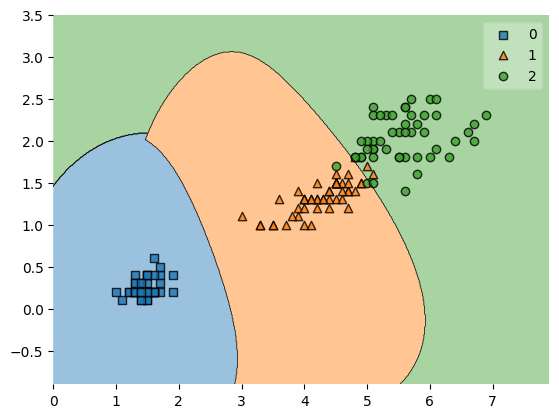

In [26]:
X=load_iris().data[:,[2,3]]
Y=load_iris().target
model=SVC(kernel='rbf', gamma='auto', C=0.5)
model.fit(X,Y)
plot_decision_regions(X,Y, clf=model)

<Axes: >

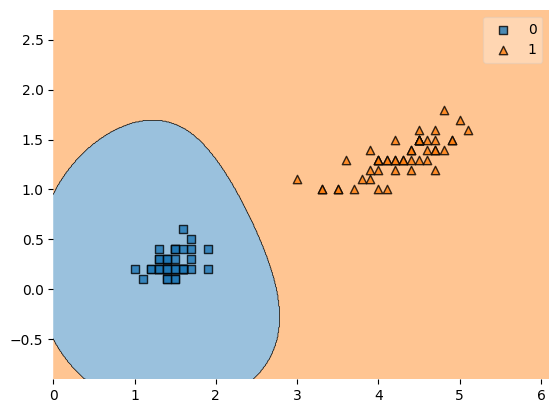

In [24]:
X=load_iris().data[:,[2,3]]
Y=load_iris().target

X=X[Y !=2]
Y=Y[Y !=2]

model=SVC(kernel='rbf', gamma=0.8, C=1)
model.fit(X,Y)
plot_decision_regions(X,Y,clf=model)


<Axes: >

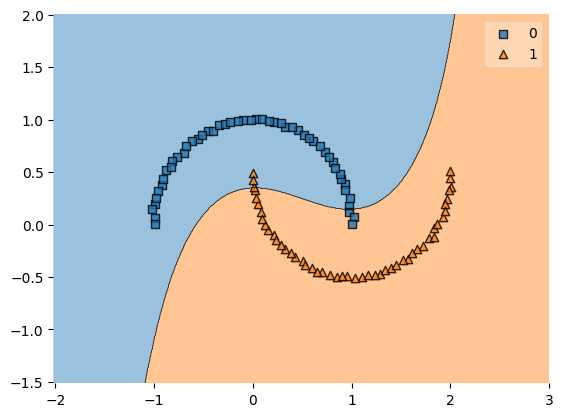

In [31]:
X,Y=make_moons(n_samples=100,random_state=10, noise=0.01)
model=SVC(kernel='rbf', gamma='auto', C=0.5)
model.fit(X,Y)
plot_decision_regions(X,Y, clf=model)